# The Sparks Foundation - Data Science and Business Analytics Internship

# Name - Chaitanya Thapliyal

## Domain - Data Science and Business Analytics
## Task 2 - Prediction Using Unsupervised ML
## Language - Python

## Importing Libraries

In [1]:
#Importing the important libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Evaluation

In [2]:
#Reading data

data = pd.read_csv("Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

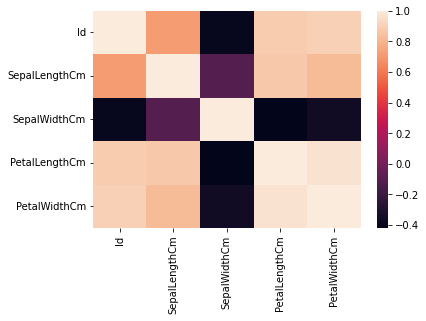

In [6]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

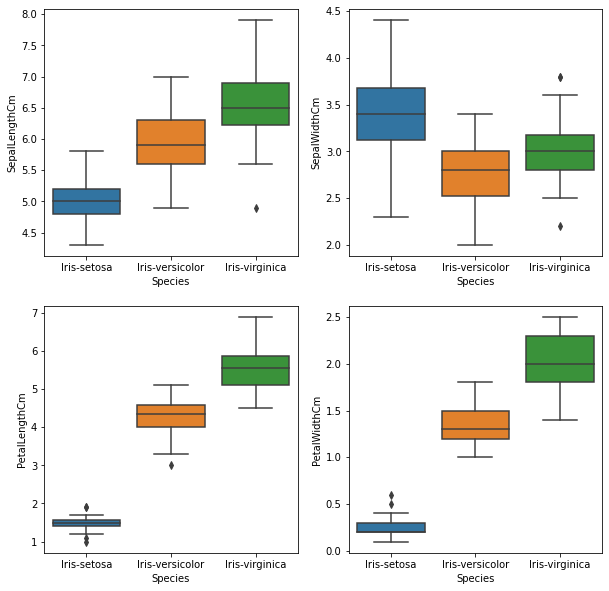

In [7]:
#Evaluating the data

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.boxplot(x = 'Species', y = 'SepalLengthCm',data = data)
plt.subplot(2,2,2)
sns.boxplot(x = 'Species', y = 'SepalWidthCm',data = data)
plt.subplot(2,2,3)
sns.boxplot(x = 'Species', y = 'PetalLengthCm',data = data)
plt.subplot(2,2,4)
sns.boxplot(x = 'Species', y = 'PetalWidthCm',data = data)

## Applying K-Means classifier

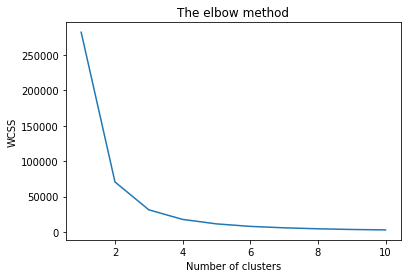

In [8]:
from sklearn.cluster import KMeans

x_data = data.iloc[:,[0,1,2,3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_data)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph
# Allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


## Visualization of data

In [9]:
# Applying kmeans to the dataset   
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 5)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x_data)
print("cluster centres",kmeans.cluster_centers_)

cluster centres [[125.           6.57058824   2.97058824   5.52352941]
 [ 25.           5.00612245   3.42040816   1.46530612]
 [ 74.5          5.922        2.78         4.206     ]]


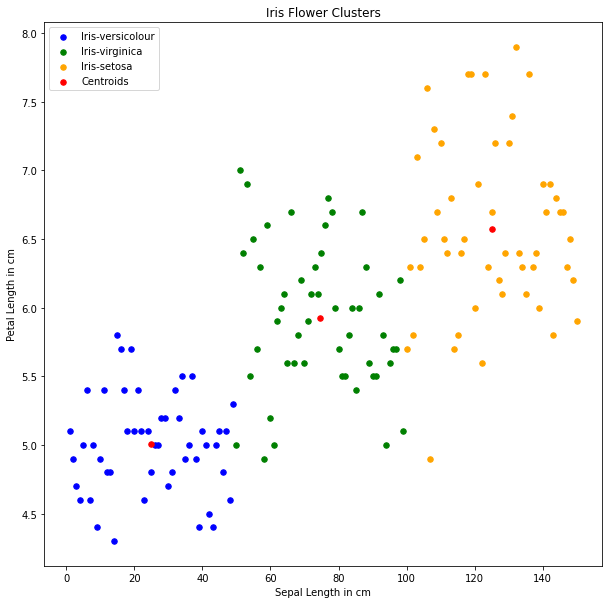

In [10]:
#Plotting the data

plt.figure(figsize = (10,10))
plt.scatter(x_data[y_kmeans == 1, 0], x_data[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x_data[y_kmeans == 2, 0], x_data[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Iris-virginica')
plt.scatter(x_data[y_kmeans == 0, 0], x_data[y_kmeans == 0, 1], s = 30, c = 'orange', label = 'Iris-setosa')

# Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 30, c = 'red', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()